In [258]:
%load_ext autoreload
%autoreload 2
import numpy as np
from mutation import *
from crossover import *
from rmp import *
from mfea import *
from task import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [309]:
gnbg_tasks = []
gnbg_tasks.append(GNBGTask(1))
gnbg_tasks.append(GNBGTask(2))
gnbg_tasks.append(GNBGTask(3))

In [312]:
crossover = ArithmeticCrossover()
mutation = AdditiveMutation(bound=100.0, delta=2.0)
rmp = NormalRMP()
pop_size = 3 * 200
indi_len = 30
bound = 100.0
a = AMFEA(pop_size, indi_len, bound, gnbg_tasks, crossover, mutation, rmp)

Initialization:
Task 0:
Best Fitness: 91725.45980187258
Mean Fitness: 171975.9786209435

Task 1:
Best Fitness: -701.3660391089215
Mean Fitness: -701.308566378617

Task 2:
Best Fitness: 45461311007.5557
Mean Fitness: 89741294736.97566



In [ ]:
bfs, mfs = a.fit(5000, monitor_rate=200)

Gen 0
Task 0:
Best Fitness: -706.8642751838142
Mean Fitness: -573.9794850353567

Task 1:
Best Fitness: -701.8921416214655
Mean Fitness: -701.8569938322673

Task 2:
Best Fitness: 760097472.0
Mean Fitness: 849444880.5742036

Gen 200
Task 0:
Best Fitness: -1068.8077392578125
Mean Fitness: -1057.0553128370782

Task 1:
Best Fitness: -702.02978515625
Mean Fitness: -702.00943359375

Task 2:
Best Fitness: 250377712.0
Mean Fitness: 274126052.94675124

Gen 400
Task 0:
Best Fitness: -1073.8560791015625
Mean Fitness: -1072.7845788574218

Task 1:
Best Fitness: -702.0481567382812
Mean Fitness: -702.0419006347656

Task 2:
Best Fitness: 107344504.0
Mean Fitness: 121990120.82604735

Gen 600
Task 0:
Best Fitness: -1075.018310546875
Mean Fitness: -1074.438412475586

Task 1:
Best Fitness: -702.052734375
Mean Fitness: -702.0506936645507

Task 2:
Best Fitness: 65424384.0
Mean Fitness: 76715487.84810984

Gen 800
Task 0:
Best Fitness: -1075.31005859375
Mean Fitness: -1075.1207849121095

Task 1:
Best Fitness: 

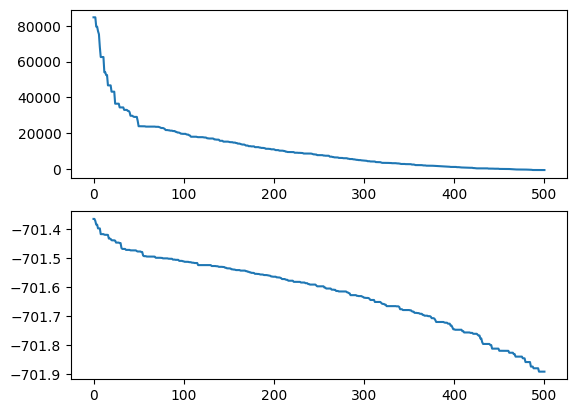

In [ ]:
fig, axes = plt.subplots(3)
axes[0].plot(bfs[0])
axes[1].plot(bfs[1])
axes[2].plot(bfs[2])

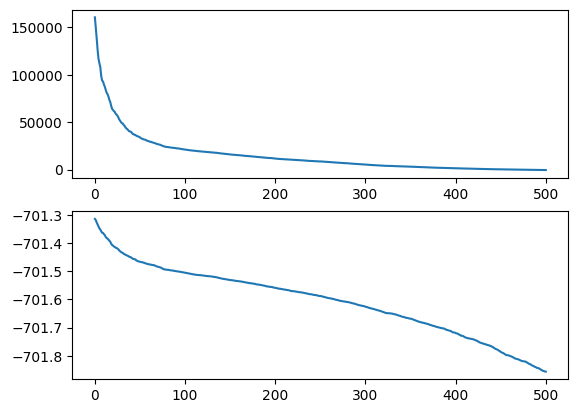

In [ ]:
fig, axes = plt.subplots(2)
axes[0].plot(mfs[0])
axes[1].plot(mfs[1])
axes[2].plot(mfs[2])

In [269]:
gnbg_task = GNBGTask(2)
x = np.random.uniform(-100, 100, size=30)
gnbg_task.fitness(x)

array([-701.29567116])